In [19]:
import os
import warnings
warnings.filterwarnings('ignore')
# os.environ['KAGGLE_USERNAME']="sambitamajumdar"
# os.environ['KAGGLE_KEY']="a0e4687ad21787f90a8233c79a69e837"

In [20]:
# !kaggle datasets download tawsifurrahman/covid19-radiography-database

In [21]:
# !unzip covid 19.zip

In [22]:
len(os.listdir('webapp/COVID-19_Radiography_Dataset/COVID/images'))

3618

# New Section

In [23]:
len(os.listdir('webapp/COVID-19_Radiography_Dataset/COVID/images'))

3618

In [24]:
len(os.listdir('webapp/COVID-19_Radiography_Dataset/Normal/images'))

10192

In [25]:
import cv2
img=cv2.imread('webapp/COVID-19_Radiography_Dataset/Normal/images/Normal-1000.png')


In [26]:
import matplotlib.pyplot as plt


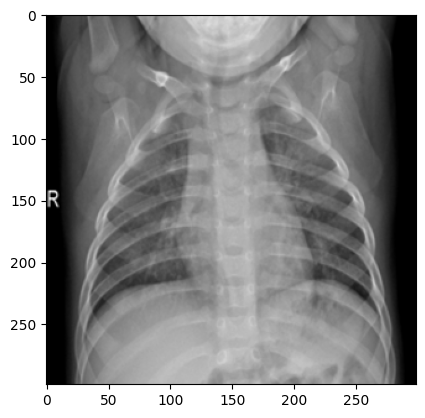

In [27]:
plt.imshow(img)

In [28]:
img.shape

(299, 299, 3)

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
df=pd.read_excel('webapp/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [30]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [31]:
urls=os.listdir('webapp/COVID-19_Radiography_Dataset/COVID/images')

In [32]:
path="webapp/COVID-19_Radiography_Dataset/COVID/images"+urls[0]

In [33]:
path

'webapp/COVID-19_Radiography_Dataset/COVID/imagesCOVID-1.png'

In [34]:
def loadImages(path,urls,target):
  images=[]
  labels=[]
  for i in range(len(urls)):
    img_path=path+"/"+urls[i]
    img=cv2.imread(img_path)
    img=img/255.0
    print(img_path)
    img=cv2.resize(img,(100,100))
    images.append(img)
    labels.append(target)
    images=np.asarray(images)
    return images,labels

In [35]:
covid_path="webapp/COVID-19_Radiography_Dataset/COVID/images"
covid_url=os.listdir(covid_path)
covidImages,covidTargets=loadImages(covid_path,covid_url,1)

webapp/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png


In [36]:
len(covid_url),len(covidImages)

(3618, 1)

In [37]:
normal_path="webapp/COVID-19_Radiography_Dataset/Normal/images"
normal_url=os.listdir("webapp/COVID-19_Radiography_Dataset/Normal/images")
normalImages,normalTargets=loadImages(normal_path,normal_url,0)

webapp/COVID-19_Radiography_Dataset/Normal/images/Normal-1.png


In [38]:
covidImages=np.asarray(covidImages)
normalImages=np.asarray(normalImages)

In [39]:
covidImages.shape
normalImages.shape


(1, 100, 100, 3)

In [40]:
data=np.r_[covidImages,normalImages]

In [41]:
data.shape

(2, 100, 100, 3)

In [42]:
targets=np.r_[covidTargets,normalTargets]

In [43]:
targets.shape

(2,)

In [44]:
data=data/255.0

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,targets,test_size=0.25)

import tensorflow as tf

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [47]:
model=Sequential([
    Conv2D(32,3,input_shape=(100,100,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation='relu'),
    MaxPooling2D(),
    Flatten(), #input layer
    Dense(128,activation='relu'),
    Dense(1, activation='sigmoid')
])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8464)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [49]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)
model.fit(x_train, y_train,batch_size=32,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6934 - accuracy: 0.0000e+00 - val_loss: 0.7065 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 77ms/step - loss: 0.6805 - accuracy: 1.0000 - val_loss: 0.7633 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 76ms/step - loss: 0.6293 - accuracy: 1.0000 - val_loss: 0.8823 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 70ms/step - loss: 0.5378 - accuracy: 1.0000 - val_loss: 1.1012 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 67ms/step - loss: 0.4098 - accuracy: 1.0000 - val_loss: 1.4826 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 65ms/step - loss: 0.2640 - accuracy: 1.0000 - val_loss: 2.1027 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 67ms/step - loss: 0.1356 - accuracy: 1.0000 - val_loss: 3.0182 - val_accuracy: 0.0000e+

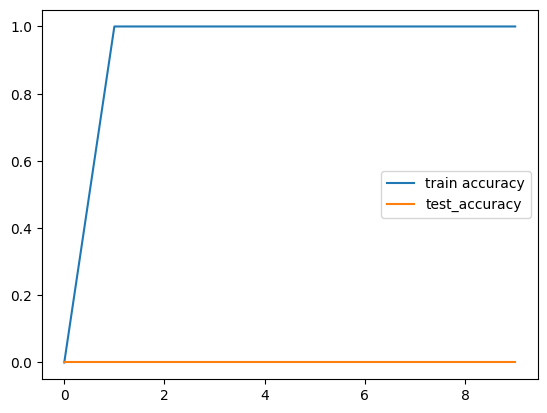

In [51]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

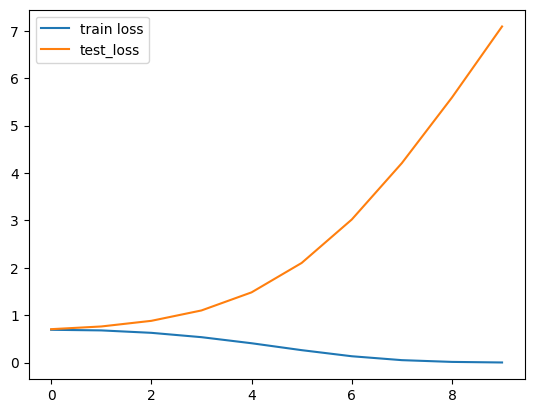

In [52]:

plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8464)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [54]:
model.save("webapp/model/covid.h5")


In [55]:
from tensorflow.keras.models import load_model
covid_model = load_model('webapp/model/covid.h5')

In [56]:
covid_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8464)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [57]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [58]:
img = load_img(r'webapp\COVID-19_Radiography_Dataset\COVID\images\COVID-2.png',target_size=(100,100))

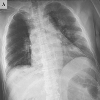

In [59]:
img

In [60]:
x = img_to_array(img)

In [61]:
x = np.reshape(x,(-1,100,100,3))

In [62]:
result = covid_model.predict(x)

1/1 [==============================] - 0s 112ms/step


In [63]:
print(result[0][0])

0.0


In [64]:
if result[0][0] == 0.0:
    print("Low Risk that you are not affected into covid-19")
else:
    print("High Risk that you are affected into covid-19")

Low Risk that you are not affected into covid-19
